In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/AI/DETECT FIELD')

In [3]:

!pip install keras==2.1.0

     |████████████████████████████████| 307kB 3.3MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.1.0 which is incompatible.
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [4]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [5]:
import tensorflow as tf
tf.__version__

'1.15.2'

In [0]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

In [7]:
import samples.field.field as field
import mrcnn.utils as utils
import mrcnn.visualize as visualize
import mrcnn.model as modellib
from mrcnn.model import log

Using TensorFlow backend.


In [0]:
config = field.FieldConFig()

In [9]:
dataset = field.FieldDataset()
dataset.load_field()

Num files: 936


In [0]:
dataset.prepare()

In [11]:
print("Image count: {}".format(len(dataset.image_ids)))
print("Class count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}, {:50}".format(i, info["name"]))

Image count: 936
Class count: 2
  0, BG                                                
  1, field                                             


In [0]:
dataset.image_ids

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

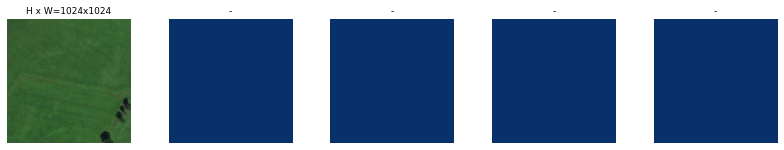

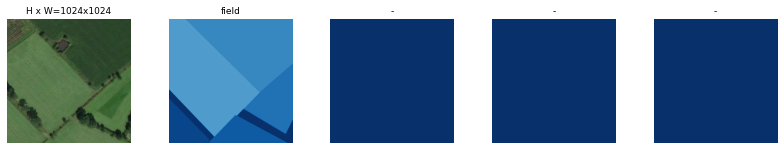

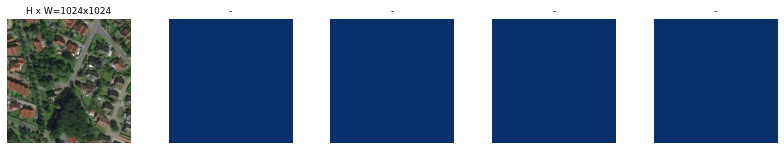

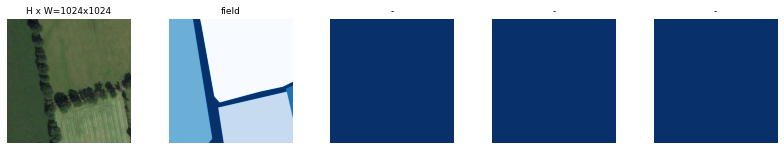

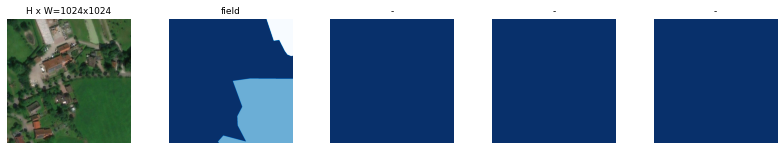

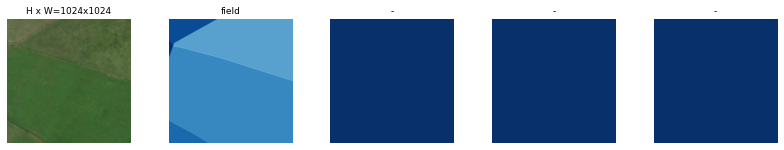

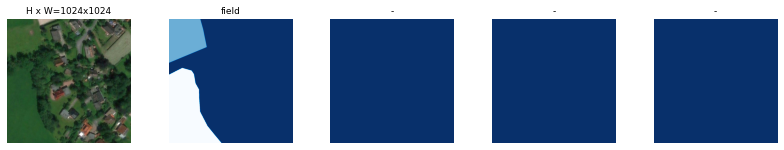

In [0]:
image_ids = np.random.choice(dataset.image_ids, 7)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

In [0]:
print("Image shape:", image.shape)
print("Mask shape:", mask.shape)
print("class_ids:", class_ids)
print("Image ID:", image_id)

Image shape: (1024, 1024, 3)
Mask shape: (1024, 1024, 2)
class_ids: [1 1]
Image ID: 229


In [0]:
bbox = utils.extract_bboxes(mask)

In [0]:
print("BBox:", bbox)

BBox: [[   0    0  361  312]
 [ 404    0 1024  433]]


In [0]:
dataset.class_names

['BG', 'field']

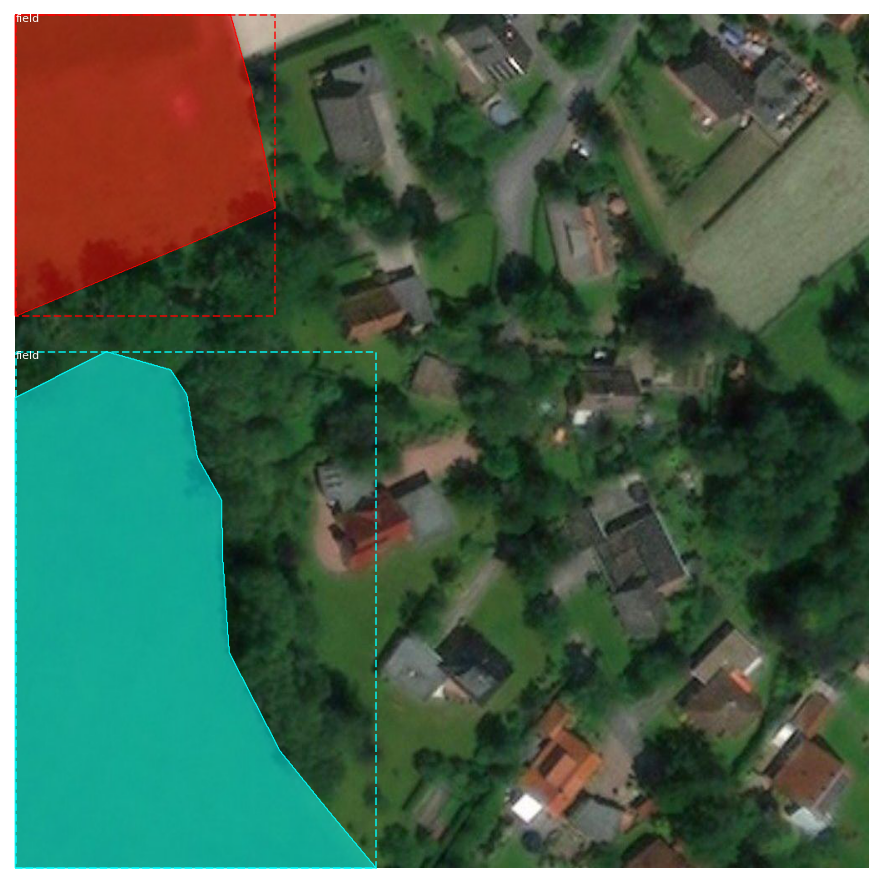

In [0]:
# display bbox
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

In [0]:
config.DETECTION_NMS_THRESHOLD = 0.6
config.USE_MINI_MASK = False
config.LEARNING_RATE = 0.001
config.DETECTION_MIN_CONFIDENCE = 0.6
config.STEPS_PER_EPOCH = 936

In [13]:
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.6
DETECTION_NMS_THRESHOLD        0.6
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [14]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir="./ndthang")






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


In [15]:
init_with = "last"  # imagenet, or last, or coco
COCO_MODEL_PATH = "./mask_rcnn_coco.h5"
if init_with == "imagenet":
  model.load_weights(model.get_imagenet_weights(), by_name=True)
if init_with == "last":
  model.load_weights(model.find_last(), by_name=True)
if init_with == "coco":
  model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])







Re-starting from epoch 84


In [0]:
model.train(dataset, dataset, learning_rate=config.LEARNING_RATE, epochs=100, layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: ./ndthang/field20200514T0139/mask_rcnn_field_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeD

/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor



Epoch 1/100
935/936 [============================>.] - ETA: 0s - loss: 2.3317 - rpn_class_loss: 0.0932 - rpn_bbox_loss: 1.0748 - mrcnn_class_loss: 0.1469 - mrcnn_bbox_loss: 0.5153 - mrcnn_mask_loss: 0.5016WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/keras/callbacks.py:791: The name tf.Summary is deprecated. Please use tf.compat.v1.Summary instead.

936/936 [==============================] - 906s 968ms/step - loss: 2.3305 - rpn_class_loss: 0.0932 - rpn_bbox_loss: 1.0744 - mrcnn_class_loss: 0.1468 - mrcnn_bbox_loss: 0.5150 - mrcnn_mask_loss: 0.5012 - val_loss: 2.6838 - val_rpn_class_loss: 0.1065 - val_rpn_bbox_loss: 1.5501 - val_mrcnn_class_loss: 0.1573 - val_mrcnn_bbox_loss: 0.4301 - val_mrcnn_mask_loss: 0.4399
Epoch 2/100
936/936 [==============================] - 311s 332ms/step - loss: 1.9450 - rpn_class_loss: 0.0621 - rpn_bbox_loss: 0.9606 - mrc

In [16]:
model.train(dataset, dataset, learning_rate=config.LEARNING_RATE, epochs=100, layers='heads')


Starting at epoch 84. LR=0.001

Checkpoint Path: ./ndthang/field20200514T0139/mask_rcnn_field_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (Time

/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor



Epoch 85/100
935/936 [============================>.] - ETA: 0s - loss: 0.5793 - rpn_class_loss: 0.0091 - rpn_bbox_loss: 0.3637 - mrcnn_class_loss: 0.0450 - mrcnn_bbox_loss: 0.0412 - mrcnn_mask_loss: 0.1203WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/keras/callbacks.py:791: The name tf.Summary is deprecated. Please use tf.compat.v1.Summary instead.

936/936 [==============================] - 775s 828ms/step - loss: 0.5790 - rpn_class_loss: 0.0091 - rpn_bbox_loss: 0.3634 - mrcnn_class_loss: 0.0450 - mrcnn_bbox_loss: 0.0412 - mrcnn_mask_loss: 0.1204 - val_loss: 0.6330 - val_rpn_class_loss: 0.0082 - val_rpn_bbox_loss: 0.4023 - val_mrcnn_class_loss: 0.0473 - val_mrcnn_bbox_loss: 0.0456 - val_mrcnn_mask_loss: 0.1296
Epoch 86/100
936/936 [==============================] - 307s 328ms/step - loss: 0.5664 - rpn_class_loss: 0.0082 - rpn_bbox_loss: 0.3497 - m

# Test

In [24]:
model = modellib.MaskRCNN(mode="inference", 
                          config=config,
                          model_dir="./ndthang")
model_path = model.find_last()
print("Load weights from ", model_path)
model.load_weights(model_path, by_name=True) 

Load weights from  ./ndthang/field20200514T0139/mask_rcnn_field_0099.h5
Re-starting from epoch 99


original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max: 1024.00000  int64
gt_class_id              shape: (5,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (5, 4)                min:    0.00000  max: 1024.00000  int32
gt_mask                  shape: (1024, 1024, 5)       min:    0.00000  max:    1.00000  bool


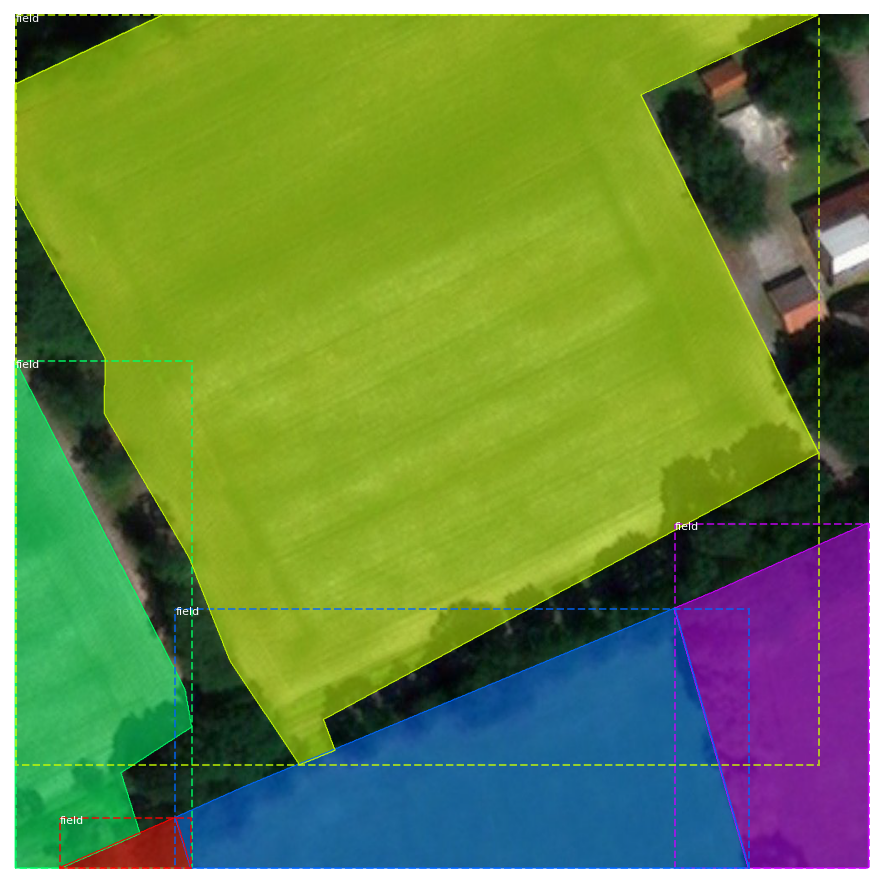

In [25]:
image_id = random.choice(dataset.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset.class_names)

In [0]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


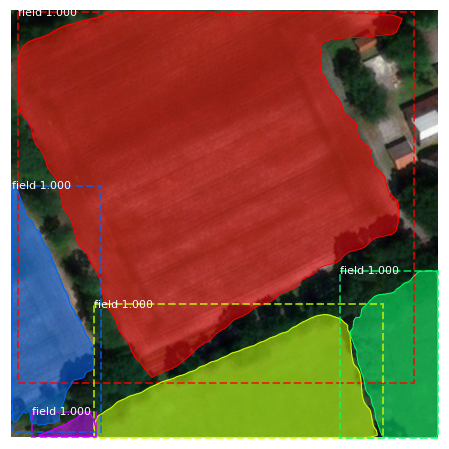

In [27]:
results = model.detect([original_image], verbose=1)
r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'],  ax=get_ax())